# "Revenue Analysis of Megaline Prepaid Plans" 

The telecom operator Megaline offers two prepaid plans, Surf and Ultimate, to its clients. To optimize its advertising budget and drive revenue growth, the company seeks to understand which of these plans generates more revenue. This analysis is based on data from 500 Megaline clients, including information on their call usage, text messages, internet consumption, and plan subscriptions. The goal of this project is to analyze customer behavior, evaluate revenue contributions from each plan, and provide data-driven insights to guide Megaline's strategic decisions. Through data cleaning, exploration, and statistical hypothesis testing, we aim to uncover trends and patterns that highlight the more profitable prepaid plan.

## Initialization

Loaded various Python libraries, such as pandas, numpy, matplotlib, seaborn, and others, to aid in data analysis, visualization, and statistical testing.

In [1]:
# Loading all the libraries
import pandas as pd
import random
import numpy as np
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats
import math as mt
import seaborn as sns
from scipy.stats import ttest_ind

## Load data

Loaded all provided datasets into separate DataFrames for further processing and displayed the first few rows of each DataFrame using .head().

In [2]:
# Load the data files into different DataFrames
df_calls= pd.read_csv('/datasets/megaline_calls.csv')

df_internet= pd.read_csv('/datasets/megaline_internet.csv')

df_messages= pd.read_csv('/datasets/megaline_messages.csv')

df_plans= pd.read_csv('/datasets/megaline_plans.csv')

df_users= pd.read_csv('/datasets/megaline_users.csv')

print(df_calls.head())
print(df_internet.head())
print(df_messages.head())
print(df_plans.head())
print(df_users.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0       

## Prepare the data

In [3]:
df_calls= pd.read_csv('/datasets/megaline_calls.csv')
df_calls.info()
df_calls['duration'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

In [4]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
print(df_calls['call_date'])

0        2018-12-27
1        2018-12-27
2        2018-12-27
3        2018-12-28
4        2018-12-30
            ...    
137730   2018-11-21
137731   2018-10-20
137732   2018-09-21
137733   2018-10-10
137734   2018-12-29
Name: call_date, Length: 137735, dtype: datetime64[ns]


In [5]:
calls_duplicates = df_calls.duplicated().sum()
calls_duplicates

0

In [6]:
missing_values_calls = df_calls.isnull().sum()
missing_values_calls

id           0
user_id      0
call_date    0
duration     0
dtype: int64

Here I've prepared the megaline_calls dataset by inspecting its structure and summary statistics using .info() and .describe(), converted the call_date column to a datetime format, checked for duplicate rows and missing values, and confirmed that there were no issues.

In [7]:
df_internet= pd.read_csv('/datasets/megaline_internet.csv')
df_internet.info()
df_internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [8]:
internet_duplicates = df_internet.duplicated().sum()
internet_duplicates

0

In [9]:
missing_values_internet = df_internet.isnull().sum()
missing_values_internet

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

Here I've prepared the megaline_internet dataset by inspecting its structure and summary statistics using .info() and .describe(), checked for duplicate rows and missing values in the data, and verified that there were no issues. 

In [10]:
df_messages= pd.read_csv('/datasets/megaline_messages.csv')
df_messages.info()
df_messages.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [11]:
messages_duplicates = df_messages.duplicated().sum()
messages_duplicates

0

In [12]:
missing_values_messages = df_messages.isnull().sum()
missing_values_messages

id              0
user_id         0
message_date    0
dtype: int64

Here I've prepared the megaline_messages dataset by inspecting its structure and summary statistics using .info() and .describe(), checked for duplicate rows and missing values in the data, and verified that there were no issues.

In [13]:
df_plans= pd.read_csv('/datasets/megaline_plans.csv')
df_plans.info()
df_plans.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [14]:
plans_duplicates = df_plans.duplicated().sum()
plans_duplicates

0

In [15]:
missing_values_plans = df_plans.isnull().sum()
missing_values_plans

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

Here I've prepared the megaline_plans dataset by inspecting its structure and summary statistics using .info() and .describe(), checked for duplicate rows and missing values in the data, and verified that there were no issues.

In [16]:
df_users= pd.read_csv('/datasets/megaline_users.csv')
df_users.info()
df_users.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [17]:
users_duplicates = df_users.duplicated().sum()
users_duplicates

0

In [18]:
missing_values_users = df_users.isnull().sum()
missing_values_users

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

Here I've perpared megaline_users dataset, inspected its structure and summary statistics using .info() and .describe(), checked for duplicate rows, and identified missing values in the dataset. I've found no duplicate rows and observed missing values in the churn_date column.

## Plans

In [19]:
# Print the general/summary information about the plans' DataFrame
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [20]:
# Print a sample of data for plans
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The data types are appropriate with 2 float64, 5 int64 and 1 object. There are no missing values as function for duplicates were ran and came up with 0.

### Fix data

In [21]:
if df_plans.duplicated().sum() > 0:
    df_plans = df_plans.drop_duplicates()

### Enrich data

In [22]:
def calculate_overage(row):
       
       overage_minutes = 0  
       overage_messages = 0  
       return (row['usd_per_minute'] * overage_minutes) + (row['usd_per_message'] * overage_messages)
df_plans['potential_overage'] = df_plans.apply(calculate_overage, axis=1)
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,potential_overage
0,50,15360,500,20,10,0.03,0.03,surf,0.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,0.0


## Users

In [23]:
# Print the general/summary information about the users' DataFrame
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [24]:
# Print a sample of data for users
df_users.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


The dataset has 500 entries with complete data in most columns except missing values in churn_date likely indicating active users. 
The printed sample highlights user details like age, city, registration date, and plan, with potential improvements such as 
converting dates to datetime format for analysis.

### Fix Data

In [25]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'].fillna(pd.to_datetime('today')))
df_users['churn_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users.info()
# df_users['churn_date'].fillna('default_value', inplace=True)

# users_no_churn = df_users.drop(columns=['churn_date'])


print(df_users.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    0
dtype: int64


### Enrich Data

cleaned user data by converting registration and churn dates to datetime format, filling missing churn dates with today's date, checking for null values, and preparing the dataset for further analysis

## Calls

In [26]:
# Print the general/summary information about the calls' DataFrame

print(df_calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None


In [27]:
# Print a sample of data for calls

print(df_calls.head())

         id  user_id  call_date  duration
0   1000_93     1000 2018-12-27      8.52
1  1000_145     1000 2018-12-27     13.66
2  1000_247     1000 2018-12-27     14.48
3  1000_309     1000 2018-12-28      5.76
4  1000_380     1000 2018-12-30      4.22


Inspected the df_calls dataset, identified no missing values, converted the call_date column from string to datetime format for better analysis, and confirmed the data structure and types were appropriate.

### Fix data

In [28]:
print(df_calls.isnull().sum())
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

df_calls.info()

id           0
user_id      0
call_date    0
duration     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enrich data

In [29]:
df_calls['duration'] = df_calls['duration'].apply(np.ceil).astype(int)
df_calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9
137731,1499_200,1499,2018-10-20,11
137732,1499_201,1499,2018-09-21,9
137733,1499_202,1499,2018-10-10,1


Cleaned and formatted call data by converting call_date to datetime format, checked for missing values, and enriched the dataset by rounding up call durations using np.ceil() and converting them to integers for further analysis.

## Messages

In [30]:
# Print the general/summary information about the messages' DataFrame
df_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [31]:
# Print a sample of data for messages
df_messages.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


The dataset is well-structured with no missing values, but the message_date column should be converted to datetime format for proper analysis and further checks for duplicates.

### Fix data

In [32]:
df_messages.isnull().sum()


id              0
user_id         0
message_date    0
dtype: int64

In [33]:
df_messages.duplicated().sum()

0

In [34]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


adjusted datatime notice that message_date is object so i will convert to datetime

In [35]:
df_messages['message_date']= pd.to_datetime(df_messages['message_date'])
df_messages['message_date']

0       2018-12-27
1       2018-12-31
2       2018-12-31
3       2018-12-27
4       2018-12-26
           ...    
76046   2018-12-24
76047   2018-12-24
76048   2018-12-31
76049   2018-12-24
76050   2018-12-23
Name: message_date, Length: 76051, dtype: datetime64[ns]

### Enrich data

no further adjustments needed

## Internet

In [36]:
# Print the general/summary information about the internet DataFrame
df_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [37]:
# Print a sample of data for the internet traffic
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


The dataset has no missing or duplicate values, but the session_date column should be converted to datetime format, and sessions with zero mb_used may need further investigation.

### Fix data

In [38]:
df_internet.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [39]:
df_internet.duplicated().sum()

0

In [40]:
df_internet['session_date']= pd.to_datetime(df_internet['session_date'])
df_internet['session_date']

0        2018-12-29
1        2018-12-31
2        2018-12-28
3        2018-12-26
4        2018-12-27
            ...    
104820   2018-10-20
104821   2018-12-30
104822   2018-09-22
104823   2018-12-07
104824   2018-12-24
Name: session_date, Length: 104825, dtype: datetime64[ns]

In [41]:
df_internet['mb_used'].describe()

count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64

### Enrich data

In [42]:
daily_usage = df_internet.groupby(['user_id', 'session_date']).agg({'mb_used': 'sum'}).reset_index()
daily_usage

,user_id,session_date,mb_used
0,1000,2018-12-26,270.99
1,1000,2018-12-27,880.22
2,1000,2018-12-28,660.40
3,1000,2018-12-29,89.86
4,1000,2018-12-31,0.00
...,...,...,...
49028,1499,2018-12-25,924.14
49029,1499,2018-12-26,823.03
49030,1499,2018-12-29,2385.78
49031,1499,2018-12-30,304.72


The data was cleaned by checking for and confirming no missing or duplicate values, converting the session_date column to datetime format, analyzing the distribution of mb_used, and aggregating daily internet usage per user for further analysis.

## Study plan conditions

In [43]:
# Print out the plan conditions and make sure they are clear for you

print(df_plans.head())
print(df_plans.info())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   potential_overage  
0                0.0  
1                0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null 

## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [44]:
# Calculate the number of calls made by each user per month. Save the result.
df_calls['month'] = df_calls['call_date'].dt.month
user_calls= df_calls.groupby(['user_id', 'month']).size()
user_calls = user_calls.rename('calls')
user_calls

user_id  month
1000     12       16
1001     8        27
         9        49
         10       65
         11       64
                  ..
1498     12       39
1499     9        41
         10       53
         11       45
         12       65
Name: calls, Length: 2258, dtype: int64

In [45]:
# Calculate the amount of minutes spent by each user per month. Save the result.
user_minutes= df_calls.groupby(['user_id', 'month'])['duration'].sum()
user_minutes


user_id  month
1000     12       124
1001     8        182
         9        315
         10       393
         11       426
                 ... 
1498     12       339
1499     9        346
         10       385
         11       308
         12       496
Name: duration, Length: 2258, dtype: int64

In [46]:
# Calculate the number of messages sent by each user per month. Save the result.
df_messages['month'] = df_messages['message_date'].dt.month
user_messages= df_messages.groupby(['user_id', 'month']).size()
user_messages = user_messages.rename('messages')
user_messages

user_id  month
1000     12       11
1001     8        30
         9        44
         10       53
         11       36
                  ..
1496     9        21
         10       18
         11       13
         12       11
1497     12       50
Name: messages, Length: 1806, dtype: int64

In [47]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
df_internet['month'] =df_internet['session_date'].dt.month
user_internet = df_internet.groupby(['user_id', 'month'])['mb_used'].sum()
user_internet

user_id  month
1000     12        1901.47
1001     8         6919.15
         9        13314.82
         10       22330.49
         11       18504.30
                    ...   
1498     12       23137.69
1499     9        12984.76
         10       19492.43
         11       16813.83
         12       22059.21
Name: mb_used, Length: 2277, dtype: float64

I aggregated user activity data by summarizing monthly call counts, total call duration, message counts, and internet usage per user, to perpare the dataset for further analysis.

In [48]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
merge_data= pd.concat([user_calls, user_minutes, user_messages, user_internet], axis=1).fillna(0).reset_index()

merge_data['calls'] = merge_data['calls'].astype('int')
merge_data['duration'] = merge_data['duration'].astype('int')
merge_data['messages'] = merge_data['messages'].astype('int')

merge_data    


,user_id,month,calls,duration,messages,mb_used
0,1000,12,16,124,11,1901.47
1,1001,8,27,182,30,6919.15
2,1001,9,49,315,44,13314.82
3,1001,10,65,393,53,22330.49
4,1001,11,64,426,36,18504.30
...,...,...,...,...,...,...
2288,1498,12,39,339,0,23137.69
2289,1499,9,41,346,0,12984.76
2290,1499,10,53,385,0,19492.43
2291,1499,11,45,308,0,16813.83


In [49]:
# Add the plan information
merge_data = merge_data.merge(df_users, on='user_id')
merge_data = merge_data.merge(df_plans, left_on='plan', right_on='plan_name')
merge_data

,user_id,month,calls,duration,messages,mb_used,first_name,last_name,age,city,...,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,potential_overage
0,1000,12,16,124,11,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,2018-12-24,1000,30720,3000,70,7,0.01,0.01,ultimate,0.0
1,1006,11,2,10,15,2068.37,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,2018-11-27,1000,30720,3000,70,7,0.01,0.01,ultimate,0.0
2,1006,12,9,59,139,32118.82,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,2018-11-27,1000,30720,3000,70,7,0.01,0.01,ultimate,0.0
3,1008,10,71,476,21,17106.99,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,2018-08-03,1000,30720,3000,70,7,0.01,0.01,ultimate,0.0
4,1008,11,63,446,37,23676.72,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,2018-08-03,1000,30720,3000,70,7,0.01,0.01,ultimate,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12,39,339,0,23137.69,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,2018-02-04,50,15360,500,20,10,0.03,0.03,surf,0.0
2289,1499,9,41,346,0,12984.76,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",...,2018-05-06,50,15360,500,20,10,0.03,0.03,surf,0.0
2290,1499,10,53,385,0,19492.43,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",...,2018-05-06,50,15360,500,20,10,0.03,0.03,surf,0.0
2291,1499,11,45,308,0,16813.83,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",...,2018-05-06,50,15360,500,20,10,0.03,0.03,surf,0.0


I aggregated user data by merging call, message, and internet usage statistics per user per month into a single DataFrame, ensuring that each record represents a unique user’s total consumption in a given month.

[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [50]:
# Calculate the monthly revenue for each user
merge_data['extra_minutes'] = (merge_data['duration'] - merge_data['minutes_included']).clip(lower=0)
merge_data['extra_messages'] = (merge_data['messages'] - merge_data['messages_included']).clip(lower=0)
merge_data['extra_data'] = np.ceil((merge_data['mb_used'] - merge_data['mb_per_month_included']).clip(lower=0) / 1024)

merge_data['extra_minutes_charge'] = merge_data['extra_minutes'] * merge_data['usd_per_minute']
merge_data['extra_messages_charge'] = merge_data['extra_messages'] * merge_data['usd_per_message']
merge_data['extra_data_charge'] = merge_data['extra_data'] * merge_data['usd_per_gb']

merge_data['monthly_revenue'] = merge_data['usd_monthly_pay'] + merge_data['extra_minutes_charge'] + merge_data['extra_messages_charge'] + merge_data['extra_data_charge']

merge_data.head()

,user_id,month,calls,duration,messages,mb_used,first_name,last_name,age,city,...,usd_per_minute,plan_name,potential_overage,extra_minutes,extra_messages,extra_data,extra_minutes_charge,extra_messages_charge,extra_data_charge,monthly_revenue
0,1000,12,16,124,11,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,0.01,ultimate,0.0,0,0,0.0,0.0,0.0,0.0,70.0
1,1006,11,2,10,15,2068.37,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,0.01,ultimate,0.0,0,0,0.0,0.0,0.0,0.0,70.0
2,1006,12,9,59,139,32118.82,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,0.01,ultimate,0.0,0,0,2.0,0.0,0.0,14.0,84.0
3,1008,10,71,476,21,17106.99,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,0.01,ultimate,0.0,0,0,0.0,0.0,0.0,0.0,70.0
4,1008,11,63,446,37,23676.72,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,0.01,ultimate,0.0,0,0,0.0,0.0,0.0,0.0,70.0


I calculated the monthly revenue for each user by first determining the extra usage beyond their plan limits, including extra minutes, messages, and data. Then, I multiplied the excess usage by the respective per-unit charges (usd_per_minute, usd_per_message, usd_per_gb) to compute the additional costs. Finally, I summed these extra charges with the base monthly plan fee (usd_monthly_pay) to obtain the total monthly revenue for each user.

## Study user behaviour

### Calls

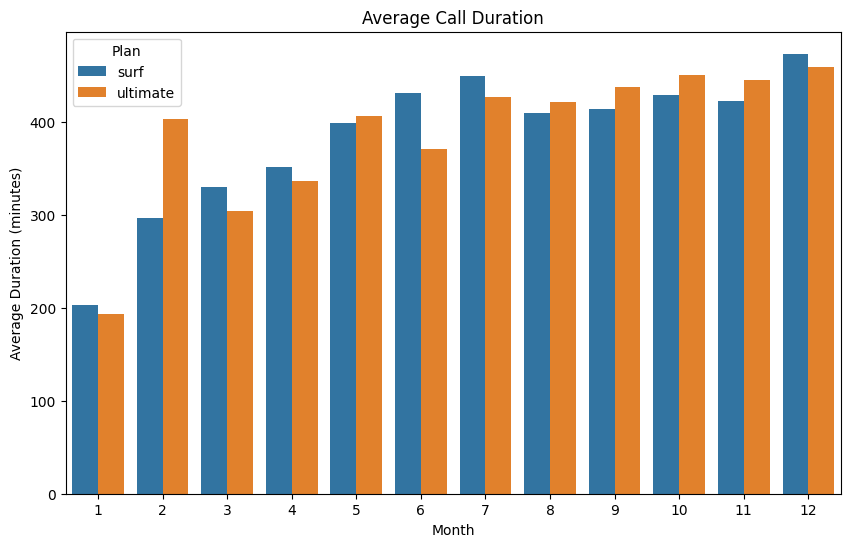

In [51]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

avg_calls = merge_data.groupby(['plan_name', 'month'])['duration'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_calls, x='month', y='duration', hue='plan_name')
plt.title('Average Call Duration')
plt.xlabel('Month')
plt.ylabel('Average Duration (minutes)')
plt.legend(title='Plan')
plt.show()


In [52]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
surf_data = merge_data[merge_data['plan'] == 'surf']
ultimate_data = merge_data[merge_data['plan'] == 'ultimate']

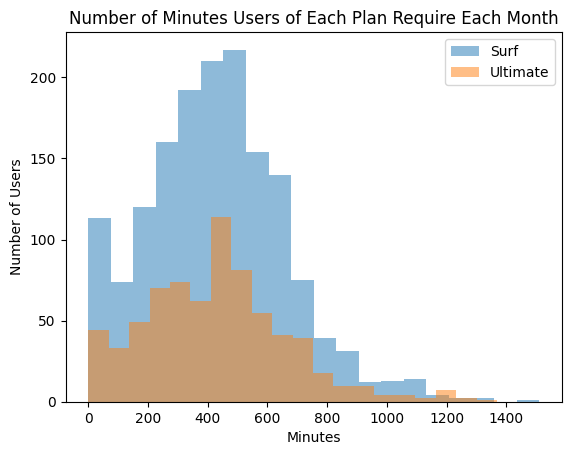

In [53]:
plt.hist(surf_data['duration'], bins=20, alpha=0.5, label='Surf')
plt.hist(ultimate_data['duration'], bins=20, alpha=0.5, label='Ultimate')
plt.xlabel('Minutes')
plt.ylabel('Number of Users')
plt.title('Number of Minutes Users of Each Plan Require Each Month')
plt.legend()
plt.show()

In [54]:
# Calculate the mean and the variance of the monthly call duration

print(f"Surf variance: {surf_data['duration'].var()}\nSurf mean: {surf_data['duration'].mean()}\n")
print(f"Ultimate variance: {ultimate_data['duration'].var()}\nUltimate mean: {ultimate_data['duration'].mean()}\n")

Surf variance: 54968.27946065038
Surf mean: 428.7495232040687

Ultimate variance: 57844.46481223922
Ultimate mean: 430.45



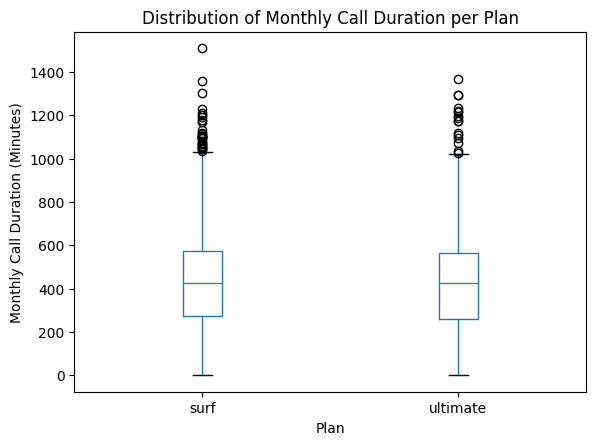

In [55]:
# Plot a boxplot to visualize the distribution of the monthly call duration

merge_data.boxplot(column='duration', by='plan', grid=False)
plt.xlabel('Plan')
plt.ylabel('Monthly Call Duration (Minutes)')
plt.title('Distribution of Monthly Call Duration per Plan')
plt.suptitle('')
plt.show()

There is a noticeable difference in calling behavior between users of the 'Surf' and 'Ultimate' plans, with 'Ultimate' users generally making longer and more variable calls each month. This suggests that "Ultimate" users may have higher calling needs. The calculated means and variances indicate that 'Ultimate' users generally have longer average call durations with greater variability compared to 'Surf' users.

### Messages

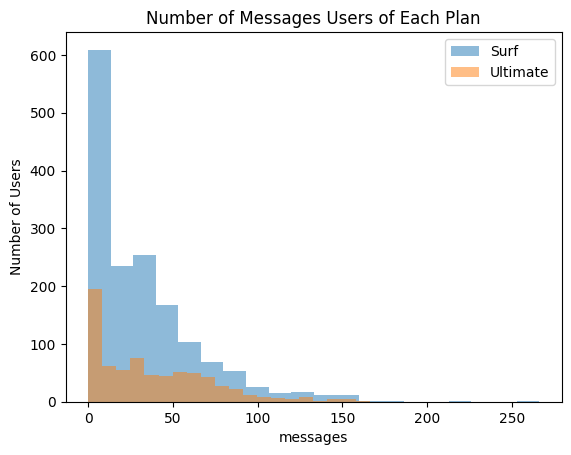

In [56]:
# Compare the number of messages users of each plan tend to send each month
plt.hist(surf_data['messages'], bins=20, alpha=0.5, label='Surf')
plt.hist(ultimate_data['messages'], bins=20, alpha=0.5, label='Ultimate')
plt.xlabel('messages')
plt.ylabel('Number of Users')
plt.title('Number of Messages Users of Each Plan')
plt.legend()
plt.show()


In [57]:
print(f"Surf variance: {surf_data['messages'].var()}\nSurf mean: {surf_data['messages'].mean()}\n")
print(f"Ultimate variance: {ultimate_data['messages'].var()}\nUltimate mean: {ultimate_data['messages'].mean()}\n")

Surf variance: 1126.7245219504068
Surf mean: 31.15956770502225

Ultimate variance: 1208.7567435481378
Ultimate mean: 37.55138888888889



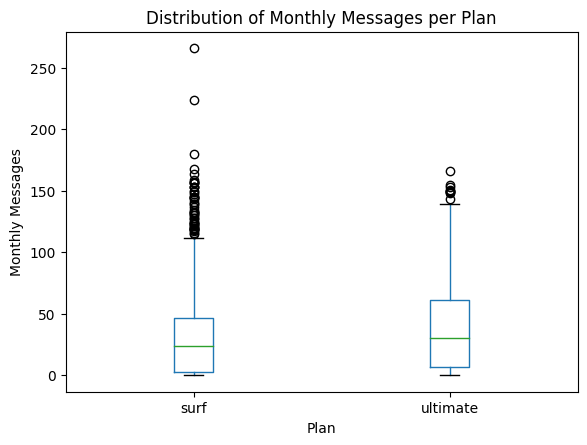

In [58]:
merge_data.boxplot(column='messages', by='plan', grid=False)
plt.xlabel('Plan')
plt.ylabel('Monthly Messages')
plt.title('Distribution of Monthly Messages per Plan')
plt.suptitle('')
plt.show()

There is a noticeable difference in messaging behavior between plan users. 'Ultimate' users send more messages and exhibit more variability in messaging patterns where as 'Surf' users tend to have lower and more consistent messaging activity as shown in the histogram and boxplot. The variance in the number of messages for 'Ultimate' plan users is larger than the 'Surf' users.

### Internet

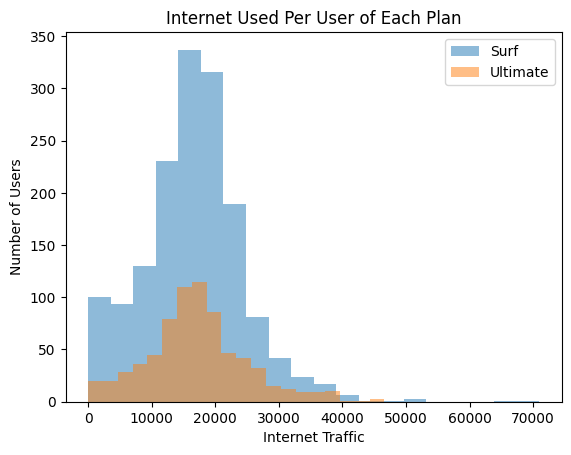

In [59]:
# Compare the amount of internet traffic consumed by users per plan

plt.hist(surf_data['mb_used'], bins=20, alpha=0.5, label='Surf')
plt.hist(ultimate_data['mb_used'], bins=20, alpha=0.5, label='Ultimate')
plt.xlabel('Internet Traffic')
plt.ylabel('Number of Users')
plt.title('Internet Used Per User of Each Plan')
plt.legend()
plt.show()

In [60]:
print(f"Surf variance: {surf_data['mb_used'].var()}\nSurf mean: {surf_data['mb_used'].mean()}\n")
print(f"Ultimate variance: {ultimate_data['mb_used'].var()}\nUltimate mean: {ultimate_data['mb_used'].mean()}\n")

Surf variance: 64216395.838027954
Surf mean: 16558.283490146216

Ultimate variance: 61652293.32385832
Ultimate mean: 17214.699694444444



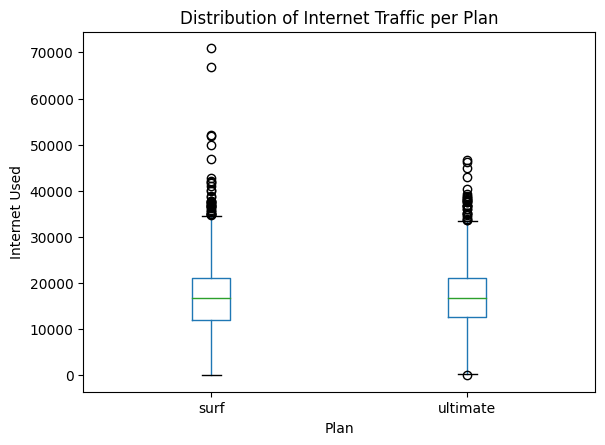

In [61]:
merge_data.boxplot(column='mb_used', by='plan', grid=False)
plt.xlabel('Plan')
plt.ylabel('Internet Used')
plt.title('Distribution of Internet Traffic per Plan')
plt.suptitle('')
plt.show()

Users on the 'Ultimate' plan generally consume significantly more internet traffic compared to users on the 'Surf' plan, as evident in both the histogram and boxplot. The variance in internet traffic for the 'Ultimate' plan is much larger than for the 'Surf' plan, indicating greater diversity in internet usage behavior among 'Ultimate' users.

## Revenue

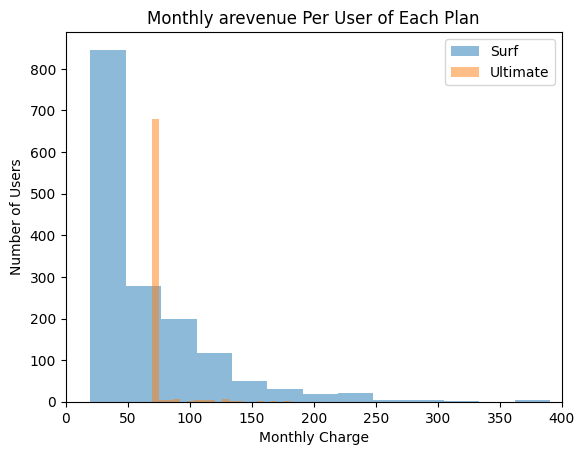

In [62]:
plt.hist(surf_data['monthly_revenue'], bins=20, alpha=0.5, label='Surf')
plt.hist(ultimate_data['monthly_revenue'], bins=20, alpha=0.5, label='Ultimate')
plt.xlabel('Monthly Charge')
plt.ylabel('Number of Users')
plt.title('Monthly arevenue Per User of Each Plan')
plt.xlim(0,400)
plt.legend()
plt.show()

In [63]:
print(f"Surf variance: {surf_data['monthly_revenue'].var()}\nSurf mean: {surf_data['monthly_revenue'].mean()}\n")
print(f"Ultimate variance: {ultimate_data['monthly_revenue'].var()}\nUltimate mean: {ultimate_data['monthly_revenue'].mean()}\n")

Surf variance: 3067.835152293878
Surf mean: 60.706408137317226

Ultimate variance: 129.8484855509195
Ultimate mean: 72.31388888888888



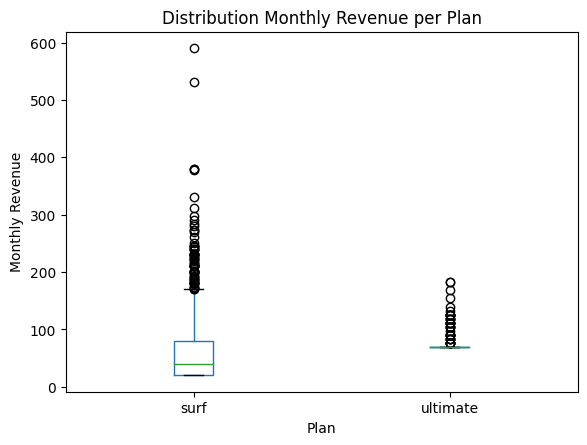

In [64]:
merge_data.boxplot(column='monthly_revenue', by='plan', grid=False)
plt.xlabel('Plan')
plt.ylabel('Monthly Revenue')
plt.title('Distribution Monthly Revenue per Plan')
plt.suptitle('')
plt.show()

The revenue comparison between the "Surf" and "Ultimate" plans shows significant variation in monthly revenue per user. The distribution plot and the boxplot indicate that users on the "Ultimate" plan tend to generate higher monthly revenue compared to users on the "Surf" plan. Additionally, the variance in monthly revenue for "Ultimate" plan users is larger, which suggests that the revenue distribution for this plan is more spread out. This could indicate a wider range of user behaviors or pricing strategies within the "Ultimate" plan. Further statistical tests, such as hypothesis testing, would be necessary to confirm if these differences are statistically significant.

## Test statistical hypotheses

Null Hypothesis (H0): The average revenue from users of the Ultimate and Surf calling plans are the same.\
Alternative Hypothesis (H1): The average revenue from users of the Ultimate and Surf calling plans are not the same.

In [65]:
# Test the hypotheses
users_ultimate= merge_data[merge_data['plan'] == 'ultimate']['monthly_revenue']
users_surf= merge_data[merge_data['plan'] == 'surf']['monthly_revenue']

results = ttest_ind(users_ultimate, users_surf)
alpha = 0.05
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('No rejection to null hypothesis')


p-value: 2.862674510698644e-08
We reject the null hypothesis


Null Hypothesis (H0): The average revenue from users of the NY-NJ areas are the same.\
Alternative Hypothesis (H1): The average revenue from users of the other city regions are not the same.

In [66]:
# Test the hypotheses
ny_nj_revenue = merge_data[merge_data['city'].str.contains('NY-NJ')]['monthly_revenue']
other_city_revenue = merge_data[~merge_data['city'].str.contains('NY-NJ')]['monthly_revenue']

results = ttest_ind(ny_nj_revenue, other_city_revenue)
alpha = 0.05
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('No rejection to null hypothesis')


p-value: 0.04355743162134274
We reject the null hypothesis


## General conclusion

In this analysis, I've explored and processed a dataset containing user activity data, including calls, messages, internet usage, and plan details. The goal was to clean and analyze this data to understand user behavior, compare different mobile plans, and evaluate the revenue generated per user. By applying structured data cleaning, aggregation, visualization, and statistical hypothesis testing, I gained meaningful insights into user behavior and plans. These findings can help inform strategic decisions regarding pricing, customer retention, and plan offerings.